In [159]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
from google.colab import drive
import sys

# Get the absolute path of the current folder
abspath_curr = '/content/drive/MyDrive/Colab Notebooks/Datathon/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/MyDrive/Colab Notebooks/utilities/p2-shallow-training'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/My Drive/Colab Notebooks/models/'

In [161]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [163]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


## Random seed

In [164]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [165]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/MyDrive/Colab Notebooks/utilities/p2-shallow-training


## Loading the data

In [166]:
import pandas as pd

# Load the raw data
df_raw = pd.read_csv(abspath_curr + '/data/Booking_Data.csv',
                     header=0)

# Remove the unnamed column
df_raw = df_raw.drop(columns='Unnamed: 17')

# Make a copy of df_raw
df = df_raw.copy(deep=True)

# Get the name of the target
target = 'Cancelled (0/1)'

In [167]:
# Print the dimension of df
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,119390,17


In [168]:
# Print the first 5 rows of df
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,$0.00,Check-Out,2015-07-01,0,$0.00,$0.00
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,$75.00,Check-Out,2015-07-02,0,$75.00,$0.00
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,$98.00,Check-Out,2015-07-03,0,$196.00,$0.00


In [169]:
# Convert 'Revenue', 'Avg Daily Rate', and 'Revenue Loss' to numeric
df['Revenue'] = df['Avg Daily Rate'] = df['Avg Daily Rate'].replace('[\$,]', '', regex=True).astype(float)
df['Avg Daily Rate'] = df['Avg Daily Rate'] = df['Avg Daily Rate'].replace('[\$,]', '', regex=True).astype(float)
df['Revenue Loss'] = df['Revenue Loss'].replace('[-\$,]', '', regex=True).astype(float)
#Convert booking id and cancelled column to string
df["Cancelled (0/1)"] = df["Cancelled (0/1)"].astype(str)
df["Booking ID"] = df["Booking ID"].astype(str)


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Booking ID            119390 non-null  object 
 1   Hotel                 119390 non-null  object 
 2   Booking Date          119390 non-null  object 
 3   Arrival Date          119390 non-null  object 
 4   Lead Time             119390 non-null  int64  
 5   Nights                119390 non-null  int64  
 6   Guests                119390 non-null  int64  
 7   Distribution Channel  119390 non-null  object 
 8   Customer Type         119390 non-null  object 
 9   Country               118902 non-null  object 
 10  Deposit Type          119390 non-null  object 
 11  Avg Daily Rate        119390 non-null  float64
 12  Status                119390 non-null  object 
 13  Status Update         119390 non-null  object 
 14  Cancelled (0/1)       119390 non-null  object 
 15  

In [171]:
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,Check-Out,2015-07-01,0,0.0,0.0
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,Check-Out,2015-07-02,0,75.0,0.0
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,Check-Out,2015-07-03,0,98.0,0.0


## 1. Booking Patterns

### A. What is the trend in booking patterns over time, and are there specific seasons or months with increased booking activity?

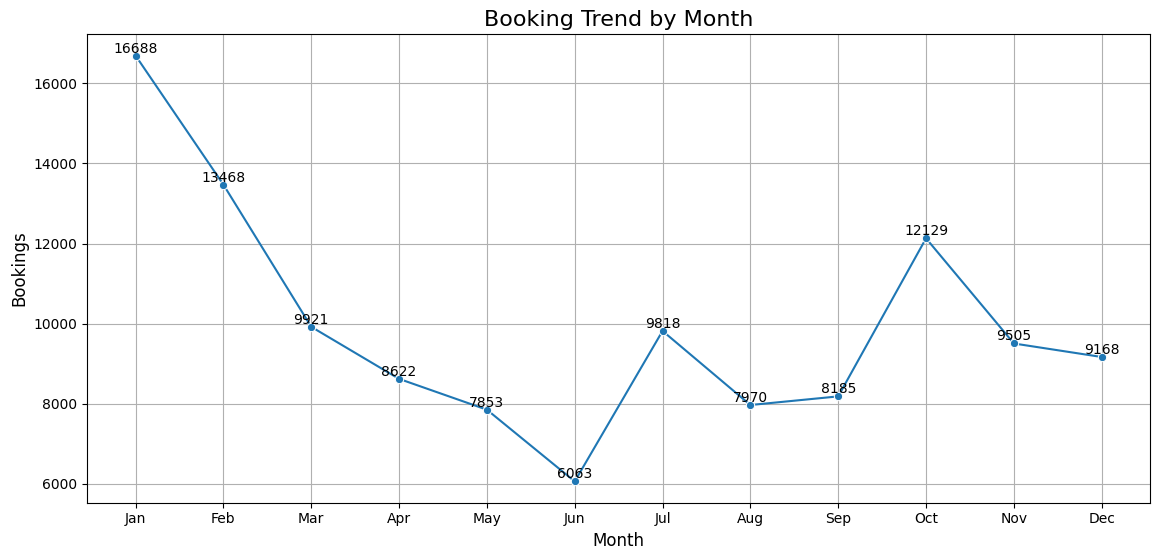

In [172]:
import seaborn as sns

# Convert "Booking Date" to datetime
df["Booking Date"] = pd.to_datetime(df["Booking Date"])

# Extract month from booking date
df["Booking Month"] = df["Booking Date"].dt.month

# Create a new column with the three-letter month abbreviations
import calendar
df["Booking Month Name"] = df["Booking Month"].apply(lambda x: calendar.month_abbr[x])

# Count bookings by month
booking_count_df = df["Booking Month Name"].value_counts().reset_index()

# Rename the columns
booking_count_df.columns = ['Month', 'Bookings']

# Define the order for the months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the defined order
booking_count_df['Month'] = pd.Categorical(booking_count_df['Month'], categories=month_order, ordered=True)

# Sort the DataFrame by the 'Month' column
booking_count_df = booking_count_df.sort_values('Month')

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month', y="Bookings", data=booking_count_df, marker='o')

# Customizing the plot
plt.title('Booking Trend by Month', fontsize=16)
plt.ylabel('Bookings', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Adding annotations
for index, row in booking_count_df.iterrows():
    plt.text(row['Month'], row['Bookings'], str(row['Bookings']), ha='center', va='bottom', fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


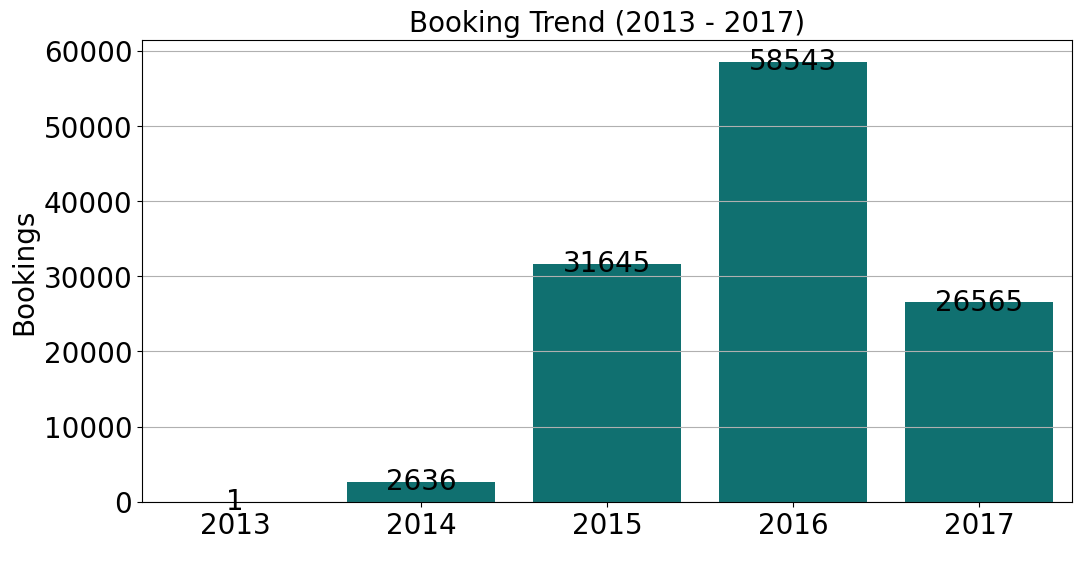

In [173]:
# Extract year from booking date
df["Booking Year"] = df["Booking Date"].dt.year
df["Booking Year"] = df["Booking Year"].astype(str)
Booking_Year_df = df["Booking Year"].value_counts()

#Convert to a DataFrame
Booking_Year_df = Booking_Year_df.reset_index()

#Rename the columns
Booking_Year_df.columns = ['Year', 'Bookings']

#Define the order for the months
year_order = ['2013', '2014', '2015', '2016', '2017']

#Convert the 'Month' column to a categorical type with the defined order
Booking_Year_df['Year'] = pd.Categorical(Booking_Year_df['Year'], categories = year_order, ordered=True)

#Sort the DataFrame by the 'Month' column
Booking_Year_df = Booking_Year_df.sort_values('Year')
plt.figure(figsize = (12,6))
barplot = sns.barplot(x = 'Year', y = 'Bookings', data = Booking_Year_df, color = 'teal')

#Iterate over the bars in the barplot and add text labels
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() + 3,
             round(bar.get_height()),
             ha='center',
             va='center')

plt.title('Booking Trend (2013 - 2017)')
plt.ylabel('Bookings')
plt.xlabel(' ')
plt.grid(axis = 'y')
plt.show()

### B. How does lead time vary across different booking channels, and is there a correlation between lead time and customer type?

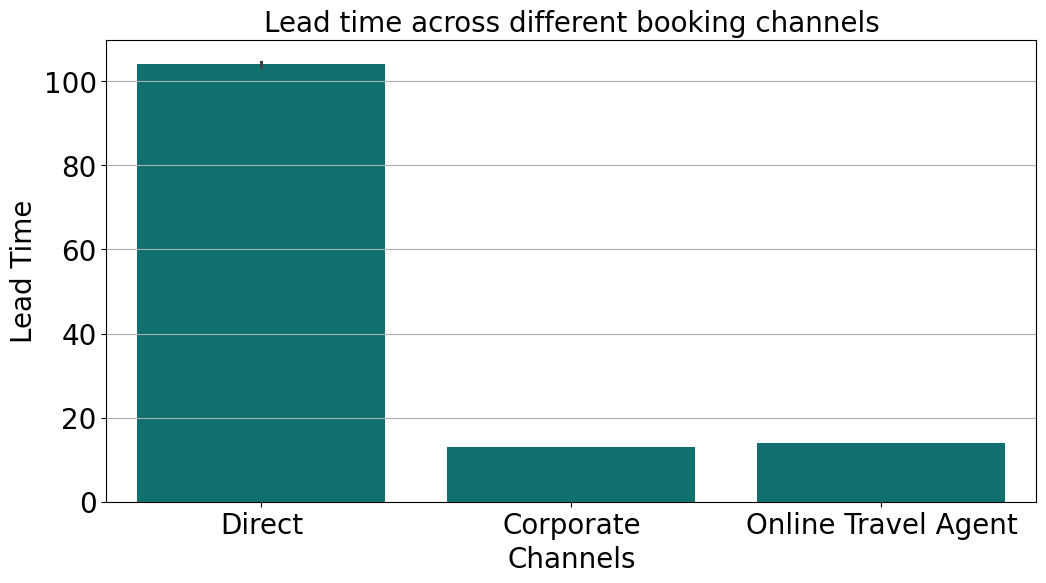

In [174]:
plt.figure(figsize = (12,6))
sns.barplot(x = 'Distribution Channel', y = 'Lead Time', data = df, color = 'teal')
plt.title('Lead time across different booking channels')
plt.ylabel('Lead Time')
plt.xlabel('Channels')
plt.grid(axis = 'y')
plt.show()

In [175]:
from scipy import stats

#convert 'Customer Type' to a numeric category type
df['Customer Type Cat'] = df['Customer Type'].astype('category').cat.codes

#Group 'Lead Time' data by 'Customer Type'
groups = df.groupby('Customer Type Cat')['Lead Time'].apply(list)

#ANOVA
f_value, p_value = stats.f_oneway(*groups)

print(f"F-value: {f_value}")
print(f"P-value: {p_value}")

F-value: 1366.498149578901
P-value: 0.0


## 2. Customer Behavior Analysis

### A. Which distribution channels contribute the most to bookings, and how does the average daily rate (ADR) differ across these channels?

In [176]:
Channel_df = df['Distribution Channel'].value_counts()

#Convert to a DataFrame
Channel_df = Channel_df.reset_index()

#Rename the columns
Channel_df.columns = ['Channel', 'Bookings']

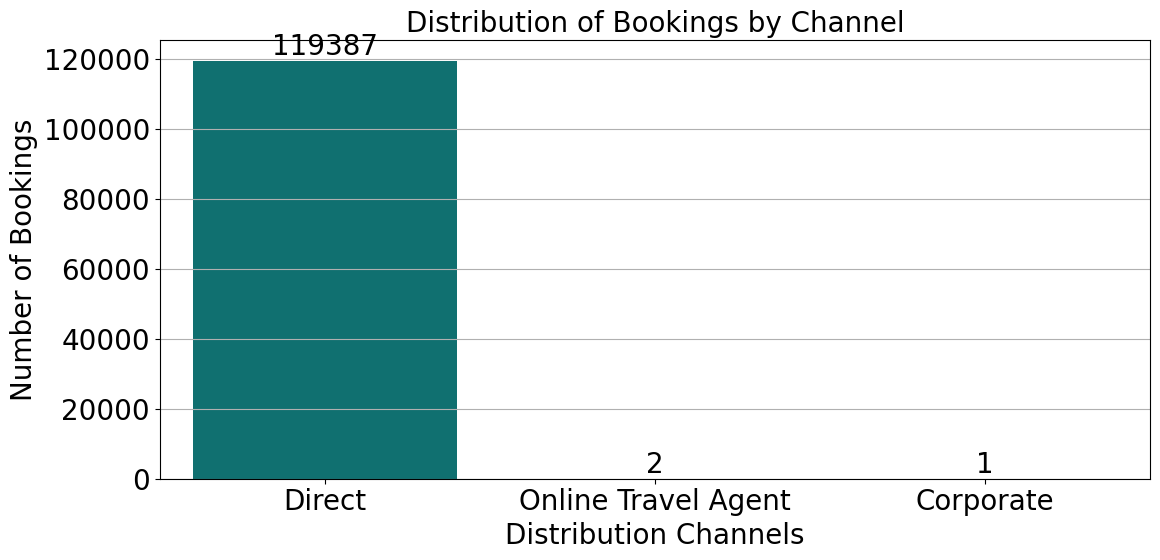

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='Channel', y='Bookings', data=Channel_df, color='teal')

# Add annotations
for index, value in enumerate(Channel_df['Bookings']):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Distribution of Bookings by Channel')
plt.ylabel('Number of Bookings')
plt.xlabel('Distribution Channels')
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## How does the average daily rate (ADR) differ across these channels?

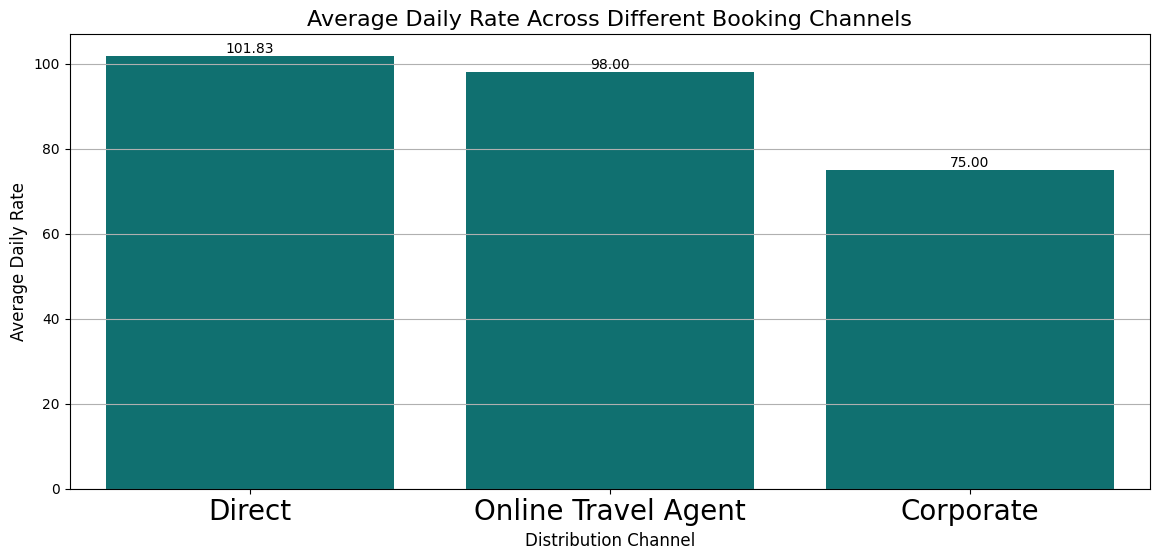

In [178]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average daily rate across different booking channels
avg_ADR = df.groupby('Distribution Channel')['Avg Daily Rate'].mean().sort_values(ascending=False)

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=avg_ADR.index, y=avg_ADR.values, color='teal')

# Adding data labels on top of each bar
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),  # Adjust the vertical position of the label
             f'{bar.get_height():.2f}',  # Format the number to two decimal places
             ha='center',
             va='bottom',
             fontsize=10)  # Set font size for data labels

# Adding title and labels
plt.title('Average Daily Rate Across Different Booking Channels', fontsize=16)
plt.xlabel('Distribution Channel', fontsize=12)
plt.ylabel('Average Daily Rate', fontsize=12)

# Customize ticks and grid
plt.yticks(fontsize=10)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()



### B. Can we identify any patterns in the distribution of guests based on their country of origin, and how does this impact revenue?

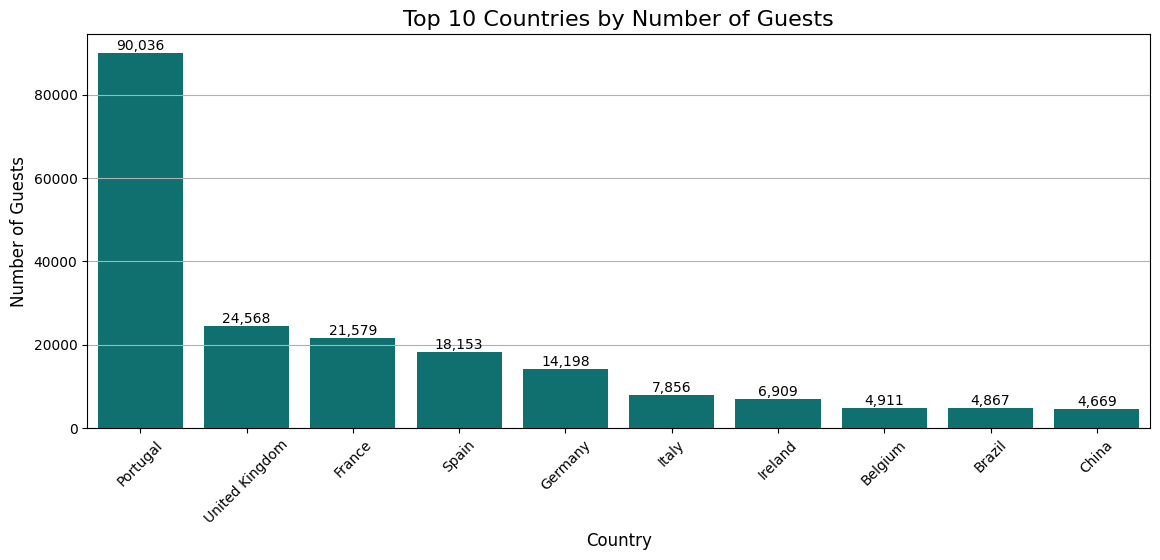

In [179]:
# Group by country and sum the number of guests
country_guests = df.groupby('Country')['Guests'].sum()

# Select the top 10 countries by number of guests
top_country_guests = country_guests.nlargest(10)

# Create the bar plot
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=top_country_guests.index, y=top_country_guests.values, color='teal')

# Adding data labels on top of each bar
for bar in barplot.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),  # Adjust the vertical position of the label
             f'{int(bar.get_height()):,}',  # Format the number with comma separator
             ha='center',
             va='bottom',
             fontsize=10)  # Set font size for data labels

# Adding title and labels
plt.title('Top 10 Countries by Number of Guests', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Guests', fontsize=12)

# Customize ticks and grid
plt.xticks(fontsize=10, rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


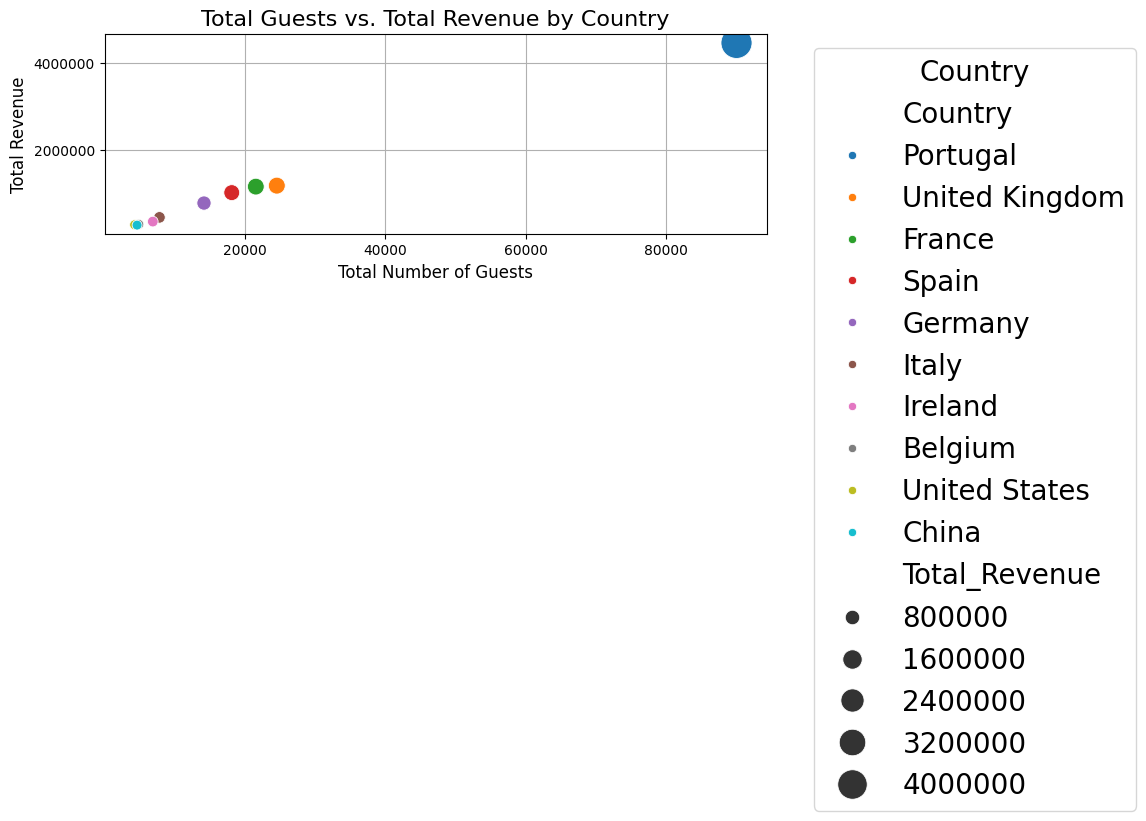

In [180]:
# Aggregate guest counts and total revenue by country
agg_df = df.groupby('Country').agg(Total_Guests=('Guests', 'sum'), Total_Revenue=('Revenue', 'sum'))

# Reset index so 'Country' becomes a column
agg_df = agg_df.reset_index()

# Filter for top countries by revenue
top_countries = agg_df.nlargest(10, 'Total_Revenue')

# Create a scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Guests', y='Total_Revenue', data=top_countries, hue='Country', size='Total_Revenue',
                sizes=(50, 500), legend='brief')

# Set y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')

# Adding title and labels
plt.title('Total Guests vs. Total Revenue by Country', fontsize=16)
plt.xlabel('Total Number of Guests', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)

# Move legend outside the plot
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

# Customize ticks and grid
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()


## 3. Revenue Optimization
### A. What is the overall revenue trend, and are there specific customer segments or countries contributing significantly to revenue?

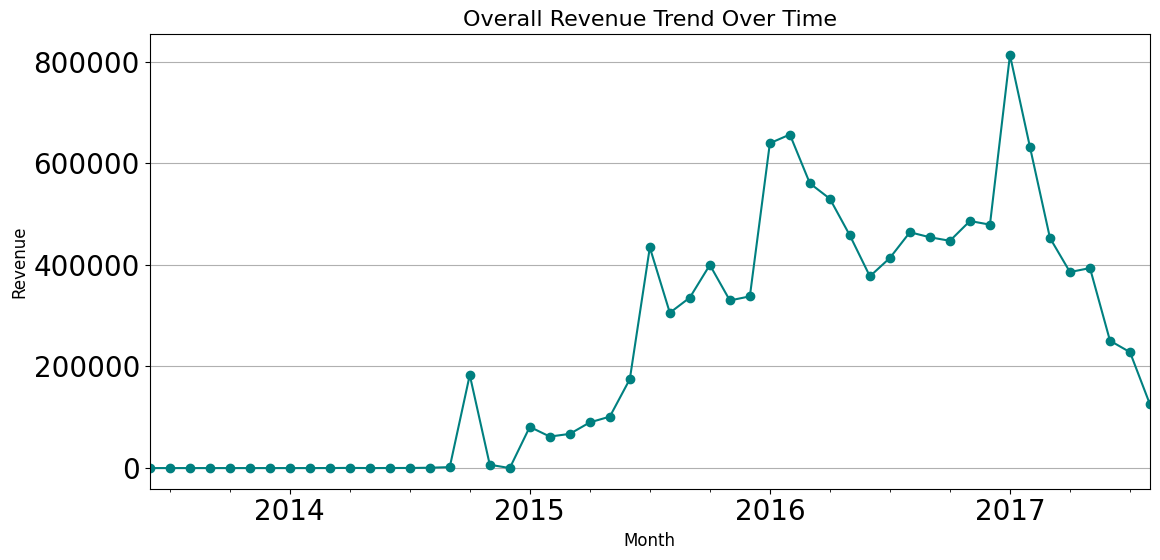

In [181]:
# Resample data to get monthly revenue
monthly_revenue = df.resample('M', on='Booking Date')['Revenue'].sum()

# Plot the overall revenue trend over time
plt.figure(figsize=(12, 6))
monthly_revenue.plot(marker='o', color='teal', linestyle='-')

# Adding title and labels
plt.title('Overall Revenue Trend Over Time', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Set y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')

# Add grid lines
plt.grid(axis='y')

# Show plot
plt.tight_layout()
plt.show()


### Are there specific customer segments or countries contributing significantly to revenue?

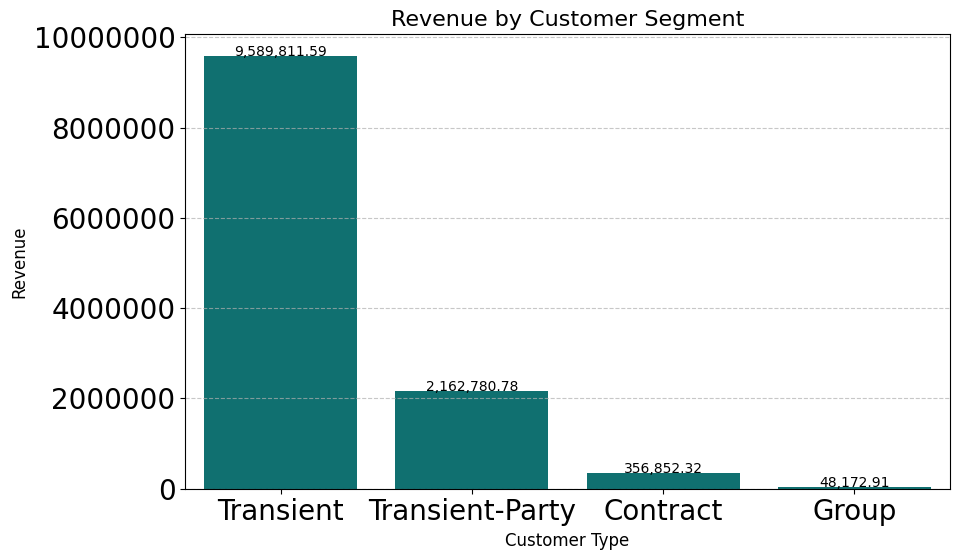

In [182]:
# Group by 'Customer Type' and sum the revenue
customer_type_revenue = df.groupby('Customer Type')['Revenue'].sum().sort_values(ascending=False)

# Plot revenue by customer segment
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_type_revenue.index, y=customer_type_revenue.values, color='teal')

# Adding labels to the bars
for index, value in enumerate(customer_type_revenue.values):
    plt.text(index, value + 1000, f'{value:,}', ha='center', fontsize=10)

# Adding title and labels
plt.title('Revenue by Customer Segment', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Setting y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


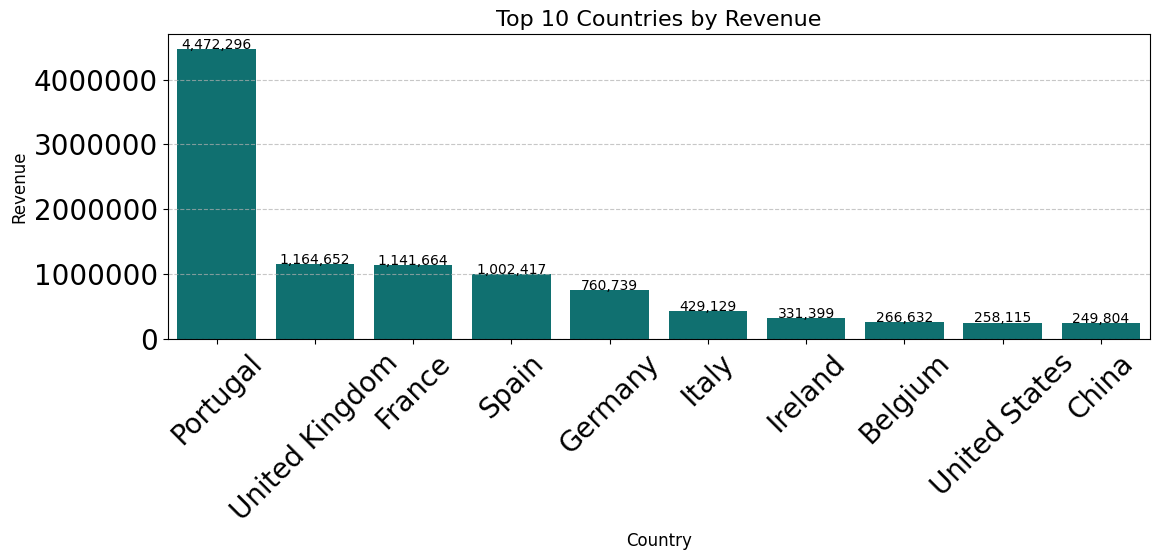

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'Country' and sum the revenue
country_revenue = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False)

# Plot the top 10 countries by revenue
plt.figure(figsize=(12, 6))
sns.barplot(x=country_revenue.head(10).index, y=country_revenue.head(10).values, color='teal')

# Adding labels to the bars
for index, value in enumerate(country_revenue.head(10).values):
    plt.text(index, value + 1000, f'{value:,.0f}', ha='center', fontsize=10)

# Adding title and labels
plt.title('Top 10 Countries by Revenue', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Setting y-axis to display full numbers
plt.ticklabel_format(style='plain', axis='y')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


### B. Can we identify optimal pricing strategies based on the Average Daily Rate (ADR) for different customer types and distribution channels?

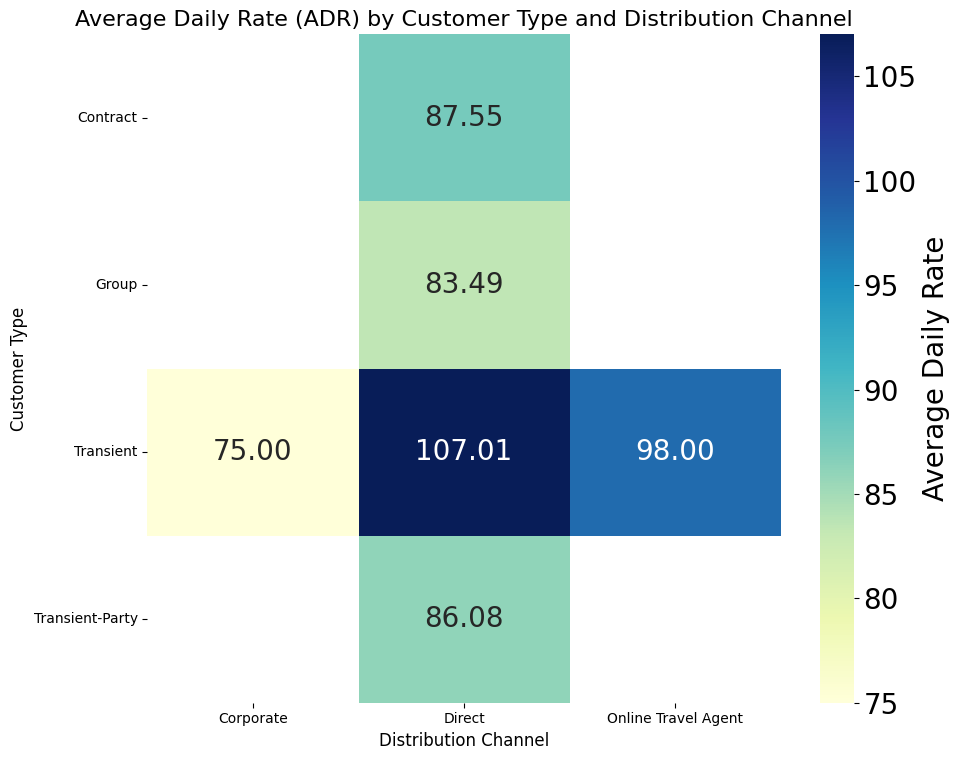

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pivot table for ADR by Customer Type and Distribution Channel
pivot_table = pd.pivot_table(df, values='Avg Daily Rate', index='Customer Type',
                             columns='Distribution Channel', aggfunc='mean')

# Heatmap of ADR for Customer Types and Distribution Channels
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='YlGnBu', cbar_kws={'label': 'Average Daily Rate'})

# Adding title and labels
plt.title('Average Daily Rate (ADR) by Customer Type and Distribution Channel', fontsize=16)
plt.ylabel('Customer Type', fontsize=12)
plt.xlabel('Distribution Channel', fontsize=12)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show plot
plt.tight_layout()
plt.show()


## 4. Geographical Analysis
### A. How does the distribution of guests vary across different countries, and are there specific countries that should be targeted for marketing efforts?

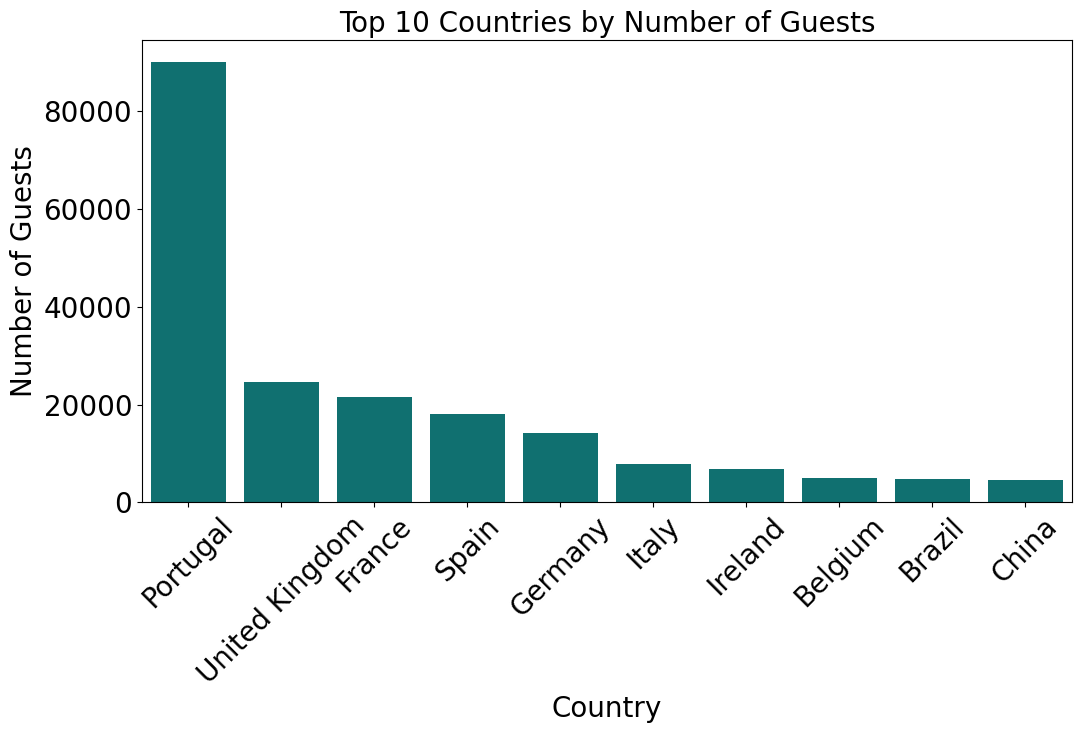

In [185]:
# Group by country and sum the number of guests
country_guests = df.groupby('Country')['Guests'].sum()

# Top 10 countries by number of guests
top_country_guests = country_guests.sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_country_guests.index, y=top_country_guests.values, color='teal')
plt.title('Top 10 Countries by Number of Guests')
plt.xlabel('Country')
plt.ylabel('Number of Guests')
plt.xticks(rotation=45)
plt.show()


### B. Is there a correlation between the country of origin and the likelihood of cancellations or extended stays?

In [186]:
#the cancellation rate by country
cancellation_rates = df.groupby('Country')['Cancelled (0/1)'].mean()

#the average length of stay by country
average_stays = df.groupby('Country')['Nights'].mean()

In [187]:
#Convert country names to categorical codes
df['Country_Code'] = df['Country'].astype('category').cat.codes

#Pearson's correlation coefficient
correlation_coef, p_value = stats.pearsonr(df['Country_Code'], df['Nights'])
print(f"Pearson's Correlation Coefficient: {correlation_coef}, P-value: {p_value}")

Pearson's Correlation Coefficient: -0.013577215623924305, P-value: 2.71231620336648e-06


## 5. Operational Efficiency
### A. What is the average length of stay for guests, and how does it differ based on booking channels or customer types?

In [188]:
#Calculate the average length of stay
avg_length_of_stay = df['Nights'].mean()

#Calculate the average length of stay by Distribution Channel
avg_length_by_channel = df.groupby('Distribution Channel')['Nights'].mean()

# Calculate the average length of stay by Customer Type
avg_length_by_customer_type = df.groupby('Customer Type')['Nights'].mean()

print(avg_length_of_stay)
print(avg_length_by_channel)
print(avg_length_by_customer_type)

3.4279001591423066
Distribution Channel
Corporate              1.000000
Direct                 3.427944
Online Travel Agent    2.000000
Name: Nights, dtype: float64
Customer Type
Contract           5.320658
Group              2.882149
Transient          3.447145
Transient-Party    3.064719
Name: Nights, dtype: float64


### B. Are there patterns in check-out dates that can inform staffing and resource allocation strategies?

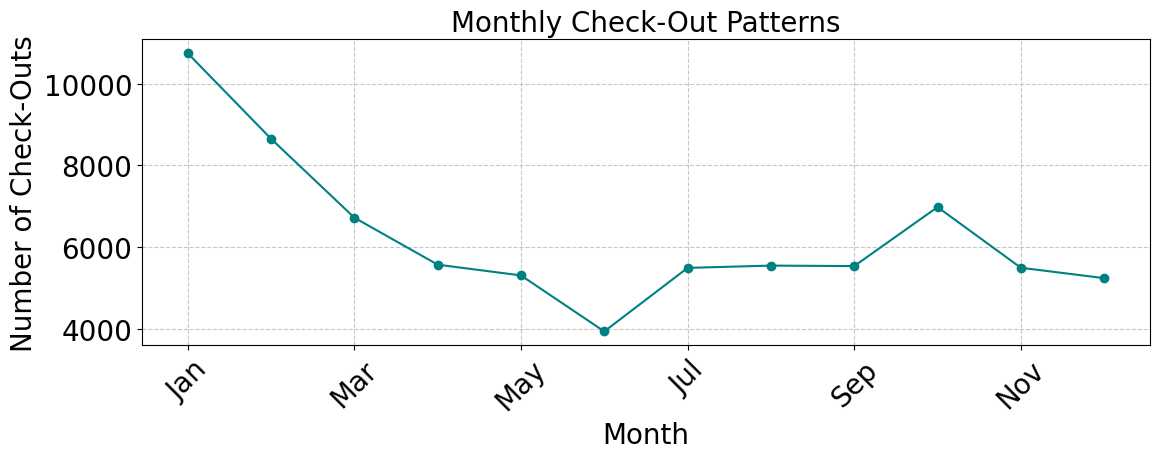

In [189]:
# Filter for checked-out bookings
checked_out_df = df[df['Status'] == 'Check-Out']

# Aggregate check-outs by month
monthly_check_out = checked_out_df['Booking Month Name'].value_counts().reindex(
    ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fill_value=0)

# Plot
plt.figure(figsize=(12, 5))
monthly_check_out.plot(kind='line', marker='o', color='teal', linestyle='-')
plt.title('Monthly Check-Out Patterns')
plt.xlabel('Month')
plt.ylabel('Number of Check-Outs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


## 6. Impact of Deposit Types

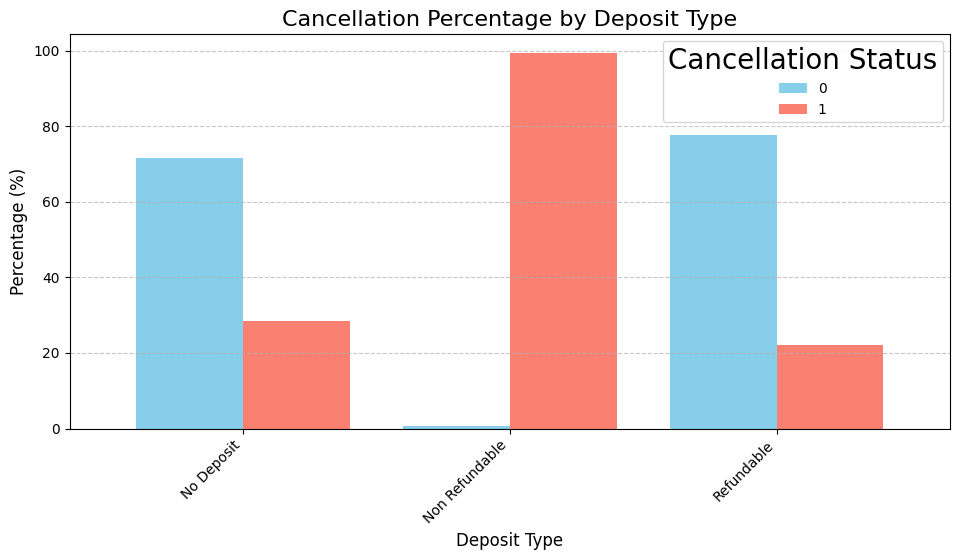

In [190]:
# Calculating percentage of cancellations for each deposit type
cancel_count = df.groupby('Deposit Type')['Cancelled (0/1)'].value_counts().unstack(fill_value=0)
cancel_percentage = cancel_count.div(cancel_count.sum(axis=1), axis=0) * 100

# Plotting the cancellation percentages in a grouped bar chart
ax = cancel_percentage.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], width=0.8)

# Beautifying the plot
plt.title('Cancellation Percentage by Deposit Type', fontsize=16)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Cancellation Status', fontsize=10)
plt.tight_layout()
plt.show()


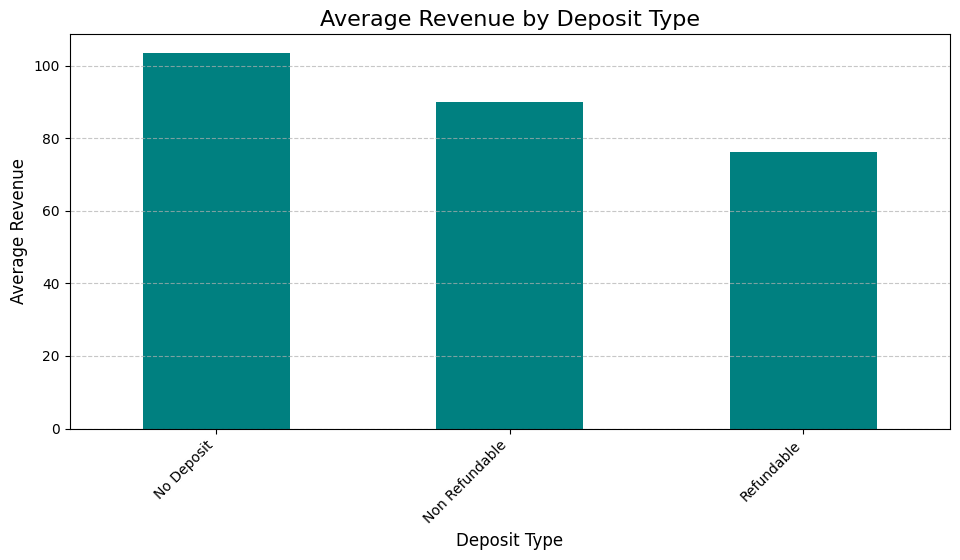

In [191]:
# Calculate the average revenue by deposit type
average_revenue = df.groupby('Deposit Type')['Revenue'].mean().sort_values(ascending=False)

# Plot the average revenue
plt.figure(figsize=(10, 6))
average_revenue.plot(kind='bar', color='teal')

# Beautify the plot
plt.title('Average Revenue by Deposit Type', fontsize=16)
plt.ylabel('Average Revenue', fontsize=12)
plt.xlabel('Deposit Type', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [192]:
#Calculate the average rate for each deposit category
avg_rate_by_deposit_type = df.groupby('Deposit Type')['Avg Daily Rate'].mean()
avg_rate_by_deposit_type

Deposit Type
No Deposit        103.525067
Non Refundable     89.964017
Refundable         76.209753
Name: Avg Daily Rate, dtype: float64

### B. Can we identify any patterns in the use of deposit types across different customer segments?

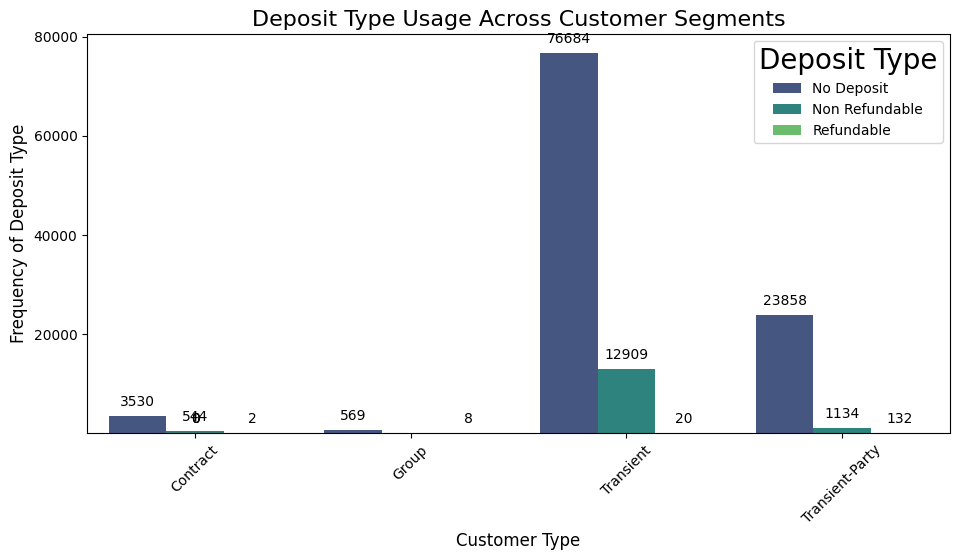

In [193]:
# Group the data by 'Customer Type' and 'Deposit Type', and count the frequencies
deposit_patterns = df.groupby(['Customer Type', 'Deposit Type']).size().reset_index(name='Count')

# Plot the data using seaborn
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=deposit_patterns, x='Customer Type', y='Count', hue='Deposit Type', palette='viridis')

# Add annotations above each bar
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Beautify the plot
plt.title('Deposit Type Usage Across Customer Segments', fontsize=16)
plt.xlabel('Customer Type', fontsize=12)
plt.ylabel('Frequency of Deposit Type', fontsize=12)
plt.legend(title='Deposit Type', fontsize=10)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Set a minimum limit for the y-axis
min_count = deposit_patterns['Count'].min()
plt.ylim(min_count * 0.9, None)  # Set the limit to 90% of the minimum count

plt.tight_layout()
plt.show()


In [194]:
deposit_patterns

,Customer Type,Deposit Type,Count
0,Contract,No Deposit,3530
1,Contract,Non Refundable,544
2,Contract,Refundable,2
3,Group,No Deposit,569
4,Group,Refundable,8
5,Transient,No Deposit,76684
6,Transient,Non Refundable,12909
7,Transient,Refundable,20
8,Transient-Party,No Deposit,23858
9,Transient-Party,Non Refundable,1134


# 7. Analysis of Corporate Bookings
### A. What is the proportion of corporate bookings, and how does their Average Daily Rate (ADR) compare to other customer types?

In [195]:
#Proportion of Corporate Bookings
total_bookings = len(df)
corporate_bookings = len(df[df['Distribution Channel'] == 'Corporate'])
corporate_proportion = corporate_bookings / total_bookings * 100
print(f"Proportion of Corporate Bookings: {corporate_proportion}%")

Proportion of Corporate Bookings: 0.0008375910880308232%


In [196]:
#average rate for each corporate bookings
avg_rate_C = df[df['Distribution Channel'] == 'Corporate']['Avg Daily Rate'].mean()
avg_rate_C

75.0

In [197]:
#average rate for each customer category
avg_rate_by_deposit_type = df.groupby('Customer Type')['Avg Daily Rate'].mean()
avg_rate_by_deposit_type

Customer Type
Contract            87.549637
Group               83.488579
Transient          107.013621
Transient-Party     86.084253
Name: Avg Daily Rate, dtype: float64

In [198]:
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,...,Status,Status Update,Cancelled (0/1),Revenue,Revenue Loss,Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,...,Check-Out,2015-07-01,0,0.0,0.0,7,Jul,2014,2,128
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,...,Check-Out,2015-07-01,0,0.0,0.0,6,Jun,2013,2,128
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,...,Check-Out,2015-07-02,0,75.0,0.0,6,Jun,2015,2,165
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,...,Check-Out,2015-07-02,0,75.0,0.0,6,Jun,2015,2,165
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,...,Check-Out,2015-07-03,0,98.0,0.0,6,Jun,2015,2,165


In [199]:
df = df.drop(['Status','Status Update', 'Revenue','Revenue Loss'], axis =1)
df.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,1,Resort,2014-07-24,2015-07-01,342,0,2,Direct,Transient,Portugal,No Deposit,0.0,0,7,Jul,2014,2,128
1,2,Resort,2013-06-24,2015-07-01,737,0,2,Direct,Transient,Portugal,No Deposit,0.0,0,6,Jun,2013,2,128
2,3,Resort,2015-06-24,2015-07-01,7,1,1,Direct,Transient,United Kingdom,No Deposit,75.0,0,6,Jun,2015,2,165
3,4,Resort,2015-06-18,2015-07-01,13,1,1,Corporate,Transient,United Kingdom,No Deposit,75.0,0,6,Jun,2015,2,165
4,5,Resort,2015-06-17,2015-07-01,14,2,2,Online Travel Agent,Transient,United Kingdom,No Deposit,98.0,0,6,Jun,2015,2,165


## Splitting the data

In [200]:
from sklearn.model_selection import train_test_split

# Divide the data into training (60%) and test (40%)
df_train, df_test = train_test_split(df,
                                     train_size=0.6,
                                     random_state=random_seed,
                                     stratify=df[target])

# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test,
                                   train_size=0.5,
                                   random_state=random_seed,
                                   stratify=df_test[target])

# Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)

In [201]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,71634,18


In [202]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,23878,18


In [203]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,23878,18


### Handling uncommon features
#### Identifying uncommon features

In [204]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,Arrival Date
1,Avg Daily Rate
2,Booking Date
3,Booking ID
4,Booking Month
5,Booking Month Name
6,Booking Year
7,Cancelled (0/1)
8,Country
9,Country_Code


In [205]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [206]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [207]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [208]:
# Remove the uncommon features from the training data
df_train = df_train.drop(columns=uncommon_feature_train_not_val_test)

# Print the first 5 rows of df_train
df_train.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,2180,Resort,2015-07-21,2015-10-04,75,10,2,Direct,Transient,Ireland,No Deposit,60.40,0,7,Jul,2015,2,77
1,80366,City,2015-10-19,2016-01-01,74,5,2,Direct,Contract,Portugal,No Deposit,86.58,1,10,Oct,2015,0,128
2,26371,Resort,2016-05-01,2016-07-25,85,5,2,Direct,Transient,Portugal,No Deposit,308.40,0,5,May,2016,2,128
3,70390,City,2016-11-02,2017-06-16,226,3,2,Direct,Transient,Portugal,Non Refundable,105.00,1,11,Nov,2016,2,128
4,83381,City,2015-11-30,2016-01-29,60,2,2,Direct,Transient,France,No Deposit,60.00,0,11,Nov,2015,2,55


In [209]:
# Remove the uncommon features from the validation data
df_val = df_val.drop(columns=uncommon_feature_val_not_train_test)

# Print the first 5 rows of df_val
df_val.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,29325,Resort,2016-10-11,2016-10-22,11,4,2,Direct,Transient-Party,Sweden,No Deposit,115.0,0,10,Oct,2016,3,152
1,534,Resort,2015-04-15,2015-07-18,94,7,2,Direct,Transient,Portugal,No Deposit,115.0,0,4,Apr,2015,2,128
2,36285,Resort,2017-04-30,2017-05-10,10,5,2,Direct,Transient,Germany,No Deposit,94.0,0,4,Apr,2017,2,60
3,26520,Resort,2015-08-24,2016-07-27,338,7,4,Direct,Transient,United Kingdom,No Deposit,164.0,0,8,Aug,2015,2,165
4,47339,City,2016-01-04,2016-02-17,44,3,2,Direct,Transient,Portugal,Non Refundable,75.0,1,1,Jan,2016,2,128


In [210]:
# Remove the uncommon features from the test data
df_test = df_test.drop(columns=uncommon_feature_test_not_train_val)

# Print the first 5 rows of df_test
df_test.head()

,Booking ID,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,27176,Resort,2017-01-26,2017-08-19,205,8,2,Direct,Group,Portugal,No Deposit,152.1,0,1,Jan,2017,1,128
1,68522,City,2016-11-25,2017-05-19,175,1,1,Direct,Transient,Portugal,Non Refundable,90.0,1,11,Nov,2016,2,128
2,118914,City,2017-02-06,2017-08-25,200,2,5,Direct,Transient,Ireland,No Deposit,294.0,0,2,Feb,2017,2,77
3,67908,City,2017-05-04,2017-05-09,5,1,2,Direct,Transient,Portugal,Non Refundable,90.0,1,5,May,2017,2,128
4,85721,City,2016-02-07,2016-03-18,40,2,3,Direct,Transient,United Kingdom,No Deposit,131.4,0,2,Feb,2016,2,165


### Handling identifiers
#### Combining the training, validation and test data

In [211]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

#### Identifying identifiers

In [212]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

,Booking ID
0,2180
1,80366
2,26371
3,70390
4,83381


In [213]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [214]:
# Print the first 5 rows of df_train
df_train.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,Resort,2015-07-21,2015-10-04,75,10,2,Direct,Transient,Ireland,No Deposit,60.40,0,7,Jul,2015,2,77
1,City,2015-10-19,2016-01-01,74,5,2,Direct,Contract,Portugal,No Deposit,86.58,1,10,Oct,2015,0,128
2,Resort,2016-05-01,2016-07-25,85,5,2,Direct,Transient,Portugal,No Deposit,308.40,0,5,May,2016,2,128
3,City,2016-11-02,2017-06-16,226,3,2,Direct,Transient,Portugal,Non Refundable,105.00,1,11,Nov,2016,2,128
4,City,2015-11-30,2016-01-29,60,2,2,Direct,Transient,France,No Deposit,60.00,0,11,Nov,2015,2,55


In [215]:
# Print the first 5 rows of df_val
df_val.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,Resort,2016-10-11,2016-10-22,11,4,2,Direct,Transient-Party,Sweden,No Deposit,115.0,0,10,Oct,2016,3,152
1,Resort,2015-04-15,2015-07-18,94,7,2,Direct,Transient,Portugal,No Deposit,115.0,0,4,Apr,2015,2,128
2,Resort,2017-04-30,2017-05-10,10,5,2,Direct,Transient,Germany,No Deposit,94.0,0,4,Apr,2017,2,60
3,Resort,2015-08-24,2016-07-27,338,7,4,Direct,Transient,United Kingdom,No Deposit,164.0,0,8,Aug,2015,2,165
4,City,2016-01-04,2016-02-17,44,3,2,Direct,Transient,Portugal,Non Refundable,75.0,1,1,Jan,2016,2,128


In [216]:
# Print the first 5 rows of df_test
df_test.head()

,Hotel,Booking Date,Arrival Date,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),Booking Month,Booking Month Name,Booking Year,Customer Type Cat,Country_Code
0,Resort,2017-01-26,2017-08-19,205,8,2,Direct,Group,Portugal,No Deposit,152.1,0,1,Jan,2017,1,128
1,City,2016-11-25,2017-05-19,175,1,1,Direct,Transient,Portugal,Non Refundable,90.0,1,11,Nov,2016,2,128
2,City,2017-02-06,2017-08-25,200,2,5,Direct,Transient,Ireland,No Deposit,294.0,0,2,Feb,2017,2,77
3,City,2017-05-04,2017-05-09,5,1,2,Direct,Transient,Portugal,Non Refundable,90.0,1,5,May,2017,2,128
4,City,2016-02-07,2016-03-18,40,2,3,Direct,Transient,United Kingdom,No Deposit,131.4,0,2,Feb,2016,2,165


### Handling date time variables
#### Transforming date time variables

In [217]:
# Get the date time variables
datetime_vars = ['Arrival Date', 'Booking Date']

In [218]:
# Call datetime_transformer on df_train
# See the implementation in pmlm_utilities.ipynb
df_train = datetime_transformer(df_train, datetime_vars)

# Print the first 5 rows of df_train
df_train.head()

,Hotel,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),...,Arrival Date_day,Arrival Date_hour,Arrival Date_minute,Arrival Date_second,Booking Date_year,Booking Date_month,Booking Date_day,Booking Date_hour,Booking Date_minute,Booking Date_second
0,Resort,75,10,2,Direct,Transient,Ireland,No Deposit,60.40,0,...,4,0,0,0,2015,7,21,0,0,0
1,City,74,5,2,Direct,Contract,Portugal,No Deposit,86.58,1,...,1,0,0,0,2015,10,19,0,0,0
2,Resort,85,5,2,Direct,Transient,Portugal,No Deposit,308.40,0,...,25,0,0,0,2016,5,1,0,0,0
3,City,226,3,2,Direct,Transient,Portugal,Non Refundable,105.00,1,...,16,0,0,0,2016,11,2,0,0,0
4,City,60,2,2,Direct,Transient,France,No Deposit,60.00,0,...,29,0,0,0,2015,11,30,0,0,0


In [219]:
# Drop multiple columns from DataFrame df_train
columns_to_drop = ['Booking Date_hour', 'Booking Date_minute', 'Booking Date_second',
                   'Arrival Date_hour', 'Arrival Date_minute', 'Arrival Date_second']

df_train.drop(columns_to_drop, axis=1, inplace=True)


In [220]:
_# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_val = datetime_transformer(df_val, datetime_vars)

# Print the first 5 rows of df_val
df_val.head()

,Hotel,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),...,Arrival Date_day,Arrival Date_hour,Arrival Date_minute,Arrival Date_second,Booking Date_year,Booking Date_month,Booking Date_day,Booking Date_hour,Booking Date_minute,Booking Date_second
0,Resort,11,4,2,Direct,Transient-Party,Sweden,No Deposit,115.0,0,...,22,0,0,0,2016,10,11,0,0,0
1,Resort,94,7,2,Direct,Transient,Portugal,No Deposit,115.0,0,...,18,0,0,0,2015,4,15,0,0,0
2,Resort,10,5,2,Direct,Transient,Germany,No Deposit,94.0,0,...,10,0,0,0,2017,4,30,0,0,0
3,Resort,338,7,4,Direct,Transient,United Kingdom,No Deposit,164.0,0,...,27,0,0,0,2015,8,24,0,0,0
4,City,44,3,2,Direct,Transient,Portugal,Non Refundable,75.0,1,...,17,0,0,0,2016,1,4,0,0,0


In [221]:
# Drop multiple columns from DataFrame df_train
columns_to_drop = ['Booking Date_hour', 'Booking Date_minute', 'Booking Date_second',
                   'Arrival Date_hour', 'Arrival Date_second', 'Arrival Date_minute']


df_val.drop(columns_to_drop, axis=1, inplace=True)


In [222]:
# Call datetime_transformer on df_val
# See the implementation in pmlm_utilities.ipynb
df_test = datetime_transformer(df_test, datetime_vars)

# Print the first 5 rows of df_test
df_test.head()

,Hotel,Lead Time,Nights,Guests,Distribution Channel,Customer Type,Country,Deposit Type,Avg Daily Rate,Cancelled (0/1),...,Arrival Date_day,Arrival Date_hour,Arrival Date_minute,Arrival Date_second,Booking Date_year,Booking Date_month,Booking Date_day,Booking Date_hour,Booking Date_minute,Booking Date_second
0,Resort,205,8,2,Direct,Group,Portugal,No Deposit,152.1,0,...,19,0,0,0,2017,1,26,0,0,0
1,City,175,1,1,Direct,Transient,Portugal,Non Refundable,90.0,1,...,19,0,0,0,2016,11,25,0,0,0
2,City,200,2,5,Direct,Transient,Ireland,No Deposit,294.0,0,...,25,0,0,0,2017,2,6,0,0,0
3,City,5,1,2,Direct,Transient,Portugal,Non Refundable,90.0,1,...,9,0,0,0,2017,5,4,0,0,0
4,City,40,2,3,Direct,Transient,United Kingdom,No Deposit,131.4,0,...,18,0,0,0,2016,2,7,0,0,0


In [223]:
# Drop multiple columns from DataFrame df_test
columns_to_drop = ['Booking Date_hour', 'Booking Date_minute', 'Booking Date_second',
                   'Arrival Date_hour', 'Arrival Date_minute', 'Arrival Date_second']


df_test.drop(columns_to_drop, axis=1, inplace=True)


In [224]:
df_train.shape

(71634, 21)

### Handling missing data
##### Combining the training, validation and test data

In [225]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

### Identifying missing values

In [226]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype
0,Country,0.004087,object


In [227]:
# Print the unique data type of variables with NaN
pd.DataFrame(df_nan['dtype'].unique(), columns=['dtype'])

,dtype
0,object


In [228]:
# Get the variables with missing values, their proportion of missing values and data type
df_miss = df_nan[df_nan['dtype'] == 'object'].reset_index(drop=True)

# Print df_miss
df_miss

,var,proportion,dtype
0,Country,0.004087,object


### Separating the training, validation and test data

In [229]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [230]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,71634,21


In [231]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,23878,21


In [232]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,23878,21


## Imputing missing values


In [233]:
from sklearn.impute import SimpleImputer

# If there are missing values
if len(df_miss['var']) > 0:
    # The SimpleImputer
    si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

    # Impute the variables with missing values in df_train, df_val and df_test
    df_train[df_miss['var']] = si.fit_transform(df_train[df_miss['var']])
    df_val[df_miss['var']] = si.transform(df_val[df_miss['var']])
    df_test[df_miss['var']] = si.transform(df_test[df_miss['var']])

## Encoding the data

### Combining the training, validation and test data

In [234]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,object
1,int64
2,float64
3,int8
4,int16


### Identifying categorical variables

In [235]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,Country,174
1,Booking Month Name,12
2,Booking Year,5
3,Customer Type,4
4,Distribution Channel,3
5,Deposit Type,3
6,Hotel,2
7,Cancelled (0/1),2


## Encoding categorical features

In [236]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()


,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Booking Month,Customer Type Cat,Country_Code,Arrival Date_year,Arrival Date_month,...,Customer Type_Transient,Customer Type_Transient-Party,Deposit Type_No Deposit,Deposit Type_Non Refundable,Deposit Type_Refundable,Distribution Channel_Corporate,Distribution Channel_Direct,Distribution Channel_Online Travel Agent,Hotel_City,Hotel_Resort
0,75,10,2,60.40,0,7,2,77,2015,10,...,1,0,1,0,0,0,1,0,0,1
1,74,5,2,86.58,1,10,0,128,2016,1,...,0,0,1,0,0,0,1,0,1,0
2,85,5,2,308.40,0,5,2,128,2016,7,...,1,0,1,0,0,0,1,0,0,1
3,226,3,2,105.00,1,11,2,128,2017,6,...,1,0,0,1,0,0,1,0,1,0
4,60,2,2,60.00,0,11,2,55,2016,1,...,1,0,1,0,0,0,1,0,1,0


In [237]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target].astype(str))

# Print the first 5 rows of df
df.head()

,Lead Time,Nights,Guests,Avg Daily Rate,Cancelled (0/1),Booking Month,Customer Type Cat,Country_Code,Arrival Date_year,Arrival Date_month,...,Customer Type_Transient,Customer Type_Transient-Party,Deposit Type_No Deposit,Deposit Type_Non Refundable,Deposit Type_Refundable,Distribution Channel_Corporate,Distribution Channel_Direct,Distribution Channel_Online Travel Agent,Hotel_City,Hotel_Resort
0,75,10,2,60.40,0,7,2,77,2015,10,...,1,0,1,0,0,0,1,0,0,1
1,74,5,2,86.58,1,10,0,128,2016,1,...,0,0,1,0,0,0,1,0,1,0
2,85,5,2,308.40,0,5,2,128,2016,7,...,1,0,1,0,0,0,1,0,0,1
3,226,3,2,105.00,1,11,2,128,2017,6,...,1,0,0,1,0,0,1,0,1,0
4,60,2,2,60.00,0,11,2,55,2016,1,...,1,0,1,0,0,0,1,0,1,0


## Separating the training, validation and test data

In [238]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [239]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,71634,217


In [240]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,23878,217


In [241]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,23878,217


## Splitting the feature and target

In [242]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

## Scaling the data

### Normalization

In [243]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

## Standardizing the features

In [244]:
# Standardize the training data
X_train = mms.fit_transform(X_train)

# Standardize the validation data
X_val = mms.transform(X_val)

# Standardize the test data
X_test = mms.transform(X_test)

## Hyperparameter Tuning

### Creating the dictionary of the models

In [245]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed)}

In [246]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [247]:
# Get the:
# feature matrix and target velctor in the combined training and validation data
# target vector in the combined training and validation data
# PredefinedSplit
# See the implementation in pmlm_utilities.ipynb
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [248]:
param_grids = {}

In [249]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [250]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [251]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [252]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [253]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/datathon/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [254]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/datathon/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.824513,"{'model__min_samples_leaf': 1, 'model__min_sam...","((DecisionTreeClassifier(max_features='sqrt', ..."
1,0.784321,"{'model__learning_rate': 0.1, 'model__min_samp...",(HistGradientBoostingClassifier(random_state=42))
2,0.776687,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(alpha=1e-05, early_stopping=Tru..."
3,0.725838,"{'model__C': 10, 'model__tol': 1e-05}","(LogisticRegression(C=10, class_weight='balanc..."


In [255]:
# Get the best_score, best_params and best_estimator obtained by GridSearchCV
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

In [256]:
from sklearn.metrics import classification_report, roc_auc_score

# Assuming you have the true labels for your test set stored in y_test

# Predictions using the best estimator
y_pred = best_estimator_gs.predict(X_test)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.4f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88     15033
           1       0.84      0.72      0.78      8845

    accuracy                           0.85     23878
   macro avg       0.84      0.82      0.83     23878
weighted avg       0.85      0.85      0.84     23878

ROC-AUC Score: 0.8205


In [258]:
# Get the best_score, best_param and best_estimator of random forest obtained by GridSearchCV
best_score_rfc, best_param_rfc, best_estimator_rfc = best_score_params_estimator_gs[0]

# Get the dataframe of feature and importance
df_fi_rfc = pd.DataFrame(np.hstack((np.setdiff1d(df.columns, [target]).reshape(-1, 1), best_estimator_rfc.named_steps['model'].feature_importances_.reshape(-1, 1))),
                         columns=['Features', 'Importance'])

# Sort df_fi_rfc in descending order of the importance
df_fi_rfc = df_fi_rfc.sort_values(ascending=False, by='Importance').reset_index(drop=True)

# Print the first 5 rows of df_fi_rfc
df_fi_rfc.head()

,Features,Importance
0,Lead Time,0.145099
1,Avg Daily Rate,0.113285
2,Booking Date_day,0.081569
3,Arrival Date_day,0.080664
4,Nights,0.060106


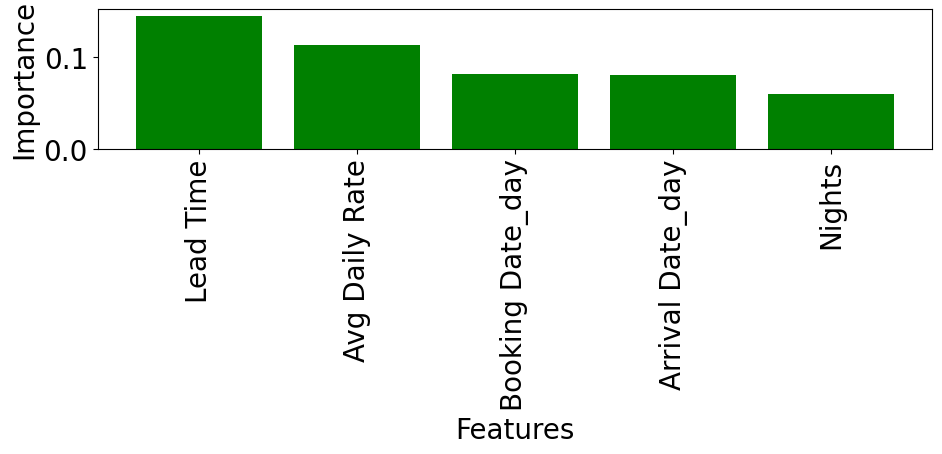

In [260]:
# Create a figure
fig = plt.figure(figsize=(10, 5))

# The bar plot of the top 5 feature importance
plt.bar(df_fi_rfc['Features'][:5], df_fi_rfc['Importance'][:5], color='green')

# Set x-axis
plt.xlabel('Features')
plt.xticks(rotation=90)

# Set y-axis
plt.ylabel('Importance')

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/feature_importance_rfc.pdf')
plt.show()